In [26]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

FIG_SIZE = (10,5)

In [27]:
file = "./voices_dataset/recordings_wav/afrikaans1-gain.wav"
file2 = "./voices_dataset/recordings_wav/amharic10-gain.wav"

In [30]:
# load audio file with Librosa
signal, sample_rate = librosa.load(file, sr=22050)
signal2, sample_rate2 = librosa.load(file2, sr=22050)

<ipython-input-31-f0a0000ba4a1>:4: FutureWarning: Pass sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.display.waveshow(signal, sample_rate, alpha=0.4)


Text(0.5, 1.0, 'Waveform')

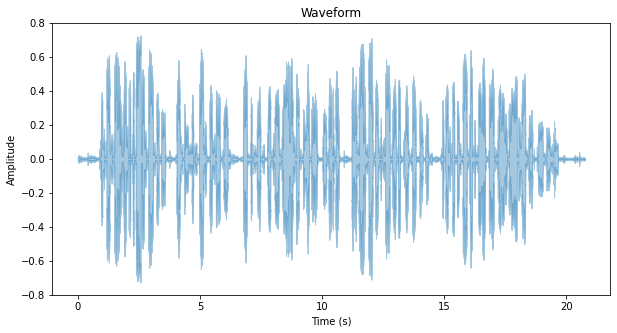

In [31]:
# WAVEFORM
# display waveform
plt.figure(figsize=FIG_SIZE)
librosa.display.waveshow(signal, sample_rate, alpha=0.4)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")

<ipython-input-56-5ab94007f3c8>:4: FutureWarning: Pass sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.display.waveshow(signal2, sample_rate2, alpha=0.4)


Text(0.5, 1.0, 'Waveform')

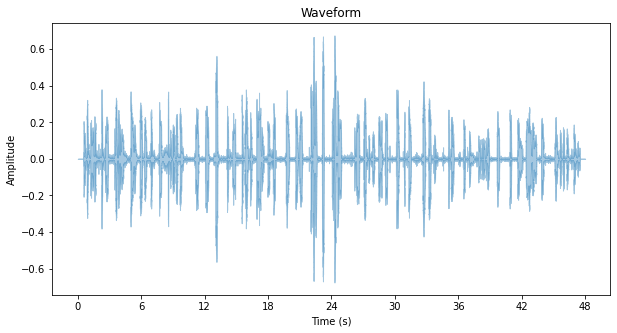

In [56]:
# WAVEFORM
# display waveform
plt.figure(figsize=FIG_SIZE)
librosa.display.waveshow(signal2, sample_rate2, alpha=0.4)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")

In [44]:
# FFT -> power spectrum
# perform Fourier transform
fft = np.fft.fft(signal)
fft2 = np.fft.fft(signal2)

In [45]:
# calculate abs values on complex numbers to get magnitude
spectrum = np.abs(fft)
spectrum2 = np.abs(fft2)

In [57]:
# create frequency variable
f = np.linspace(0, sample_rate, len(spectrum))
f2 = np.linspace(0, sample_rate2, len(spectrum2))

In [58]:
# take half of the spectrum and frequency
left_spectrum = spectrum[:int(len(spectrum)/2)]
left_f = f[:int(len(spectrum)/2)]

In [59]:
left_spectrum2 = spectrum[:int(len(spectrum2)/2)]
left_f2 = f[:int(len(spectrum2)/2)]

Text(0.5, 1.0, 'Power spectrum')

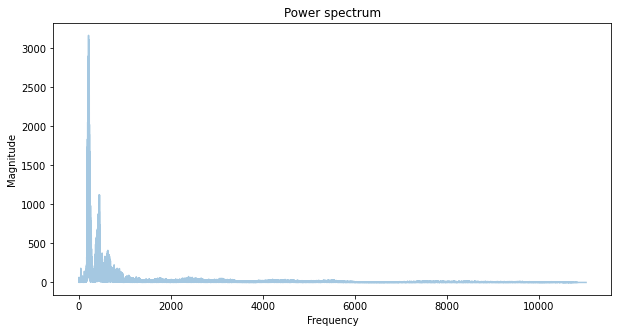

In [60]:
# plot spectrum
plt.figure(figsize=FIG_SIZE)
plt.plot(left_f, left_spectrum, alpha=0.4)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")

Text(0.5, 1.0, 'Power spectrum')

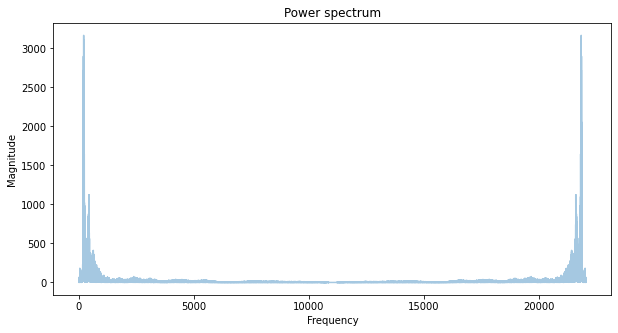

In [61]:
# plot spectrum
plt.figure(figsize=FIG_SIZE)
plt.plot(left_f2, left_spectrum2, alpha=0.4)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")

In [51]:
# STFT -> spectrogram
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples

In [52]:
# calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


Text(0.5, 1.0, 'Spectrogram')

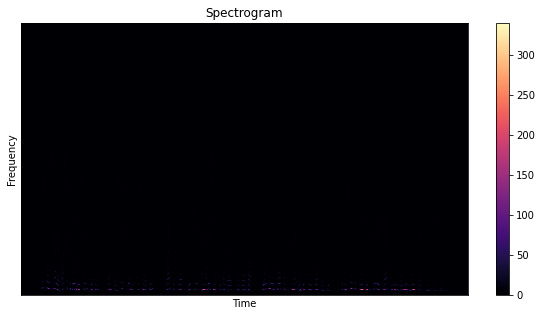

In [53]:
# perform stft
stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)

# calculate abs values on complex numbers to get magnitude
spectrogram = np.abs(stft)

# display spectrogram
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("Spectrogram")

Text(0.5, 1.0, 'Spectrogram')

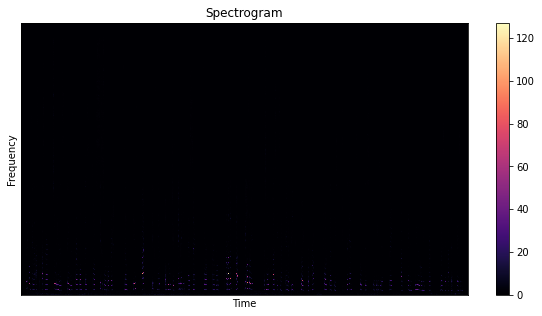

In [64]:
# perform stft
stft = librosa.stft(signal2, n_fft=n_fft, hop_length=hop_length)

# calculate abs values on complex numbers to get magnitude
spectrogram2 = np.abs(stft)

# display spectrogram
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(spectrogram2, sr=sample_rate2, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("Spectrogram")

Text(0.5, 1.0, 'Spectrogram (dB)')

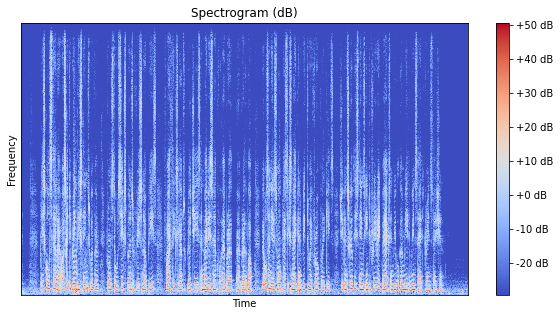

In [54]:
# apply logarithm to cast amplitude to Decibels
log_spectrogram = librosa.amplitude_to_db(spectrogram)

plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")

Text(0.5, 1.0, 'Spectrogram (dB)')

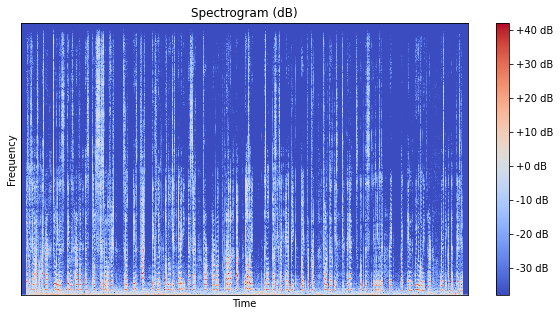

In [65]:
# apply logarithm to cast amplitude to Decibels
log_spectrogram = librosa.amplitude_to_db(spectrogram2)

plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(log_spectrogram, sr=sample_rate2, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")

<ipython-input-55-e92a27596f6a>:3: FutureWarning: Pass y=[ 0.00717071  0.01059684  0.00808429 ... -0.00172775 -0.00143753
  0.        ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(signal, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)


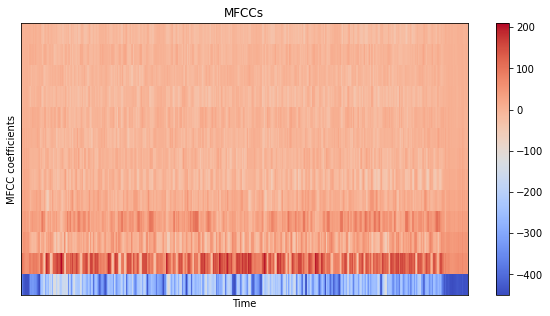

In [55]:
# MFCCs
# extract 13 MFCCs
MFCCs = librosa.feature.mfcc(signal, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)

# display MFCCs
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")

# show plots
plt.show()

<ipython-input-66-0b6cee584b26>:3: FutureWarning: Pass y=[ 1.0253149e-05  2.7721642e-06 -7.2740238e-07 ...  7.9379461e-05
  1.0172810e-04  7.5638382e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(signal2, sample_rate2, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)


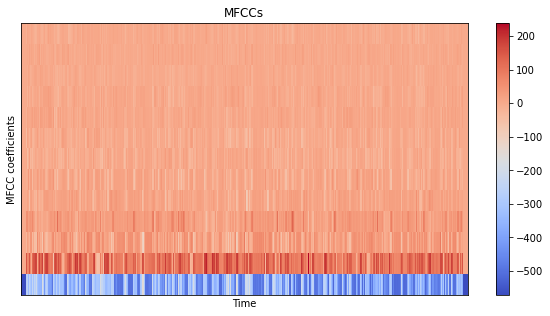

In [66]:
# MFCCs
# extract 13 MFCCs
MFCCs = librosa.feature.mfcc(signal2, sample_rate2, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)

# display MFCCs
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(MFCCs, sr=sample_rate2, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")

# show plots
plt.show()